In [172]:
import pandas as pd
import numpy as np

df = pd.read_csv('FRAFirm.csv')
df

,FIRM,class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,-10,0,290,610,320,0,999,0,6,5.0,...,-4.0,-4.67,0,0,0,0,0,0,0,0
1,-10,0,905,1265,360,0,295,0,6,5.0,...,-4.0,-4.67,-10,320,0,0,0,0,0,0
2,5,0,1040,1505,465,0,999,1,1,5.0,...,0.0,0.00,-10,360,-10,320,0,0,0,0
3,4,0,920,1295,375,0,855,0,2,5.0,...,0.0,-0.67,5,465,-10,360,0,0,0,0
4,1,0,1280,1775,495,1,999,1,1,2.0,...,-1.0,0.00,4,375,5,465,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38754,-2,0,855,1275,420,0,999,0,6,5.0,...,-3.0,-4.00,-3,490,-2,660,0,0,0,0
38755,-9,0,105,480,375,1,999,0,7,2.0,...,-5.0,-5.50,-2,420,-3,490,0,0,0,0
38756,-10,0,360,880,520,0,999,0,8,5.0,...,-6.0,-6.50,-9,375,-2,420,0,0,0,0
38757,-9,0,720,1275,555,0,999,0,9,5.0,...,-6.0,-7.83,-10,520,-9,375,0,0,0,0


In [173]:
df = df.drop(columns='class').join(df['class'])
df

,FIRM,Start,End,Length,Night,Gap,WS,idx,Base,StartAdj,...,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ,class
0,-10,290,610,320,0,999,0,6,5.0,-3.25,...,-4.67,0,0,0,0,0,0,0,0,0
1,-10,905,1265,360,0,295,0,6,5.0,-3.25,...,-4.67,-10,320,0,0,0,0,0,0,0
2,5,1040,1505,465,0,999,1,1,5.0,0.00,...,0.00,-10,360,-10,320,0,0,0,0,0
3,4,920,1295,375,0,855,0,2,5.0,0.00,...,-0.67,5,465,-10,360,0,0,0,0,0
4,1,1280,1775,495,1,999,1,1,2.0,0.00,...,0.00,4,375,5,465,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38754,-2,855,1275,420,0,999,0,6,5.0,0.00,...,-4.00,-3,490,-2,660,0,0,0,0,0
38755,-9,105,480,375,1,999,0,7,2.0,0.00,...,-5.50,-2,420,-3,490,0,0,0,0,0
38756,-10,360,880,520,0,999,0,8,5.0,-2.00,...,-6.50,-9,375,-2,420,0,0,0,0,0
38757,-9,720,1275,555,0,999,0,9,5.0,0.00,...,-7.83,-10,520,-9,375,0,0,0,0,0


# 1 . The first question we would like answered is this: Are the two types of accident distinguishable? 

1 and 2, really are different types of accident?

One hypothesis is that if there is no difference between the two, then the features should be very similar
Since the features are very similar, it should be difficult to achieve good performance using machine learning classification algorithms

But we can also visualize the difference in features between the two classes here using kerneldensity

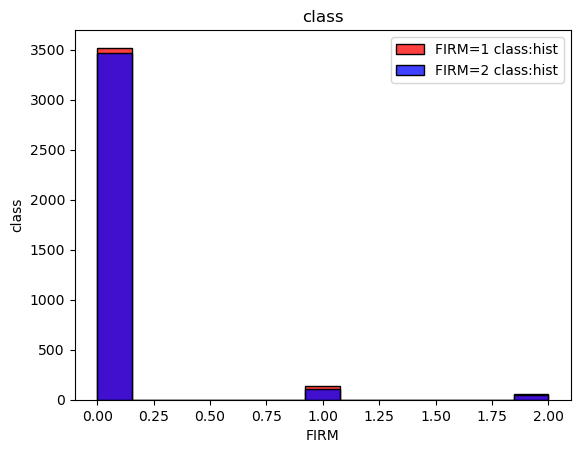

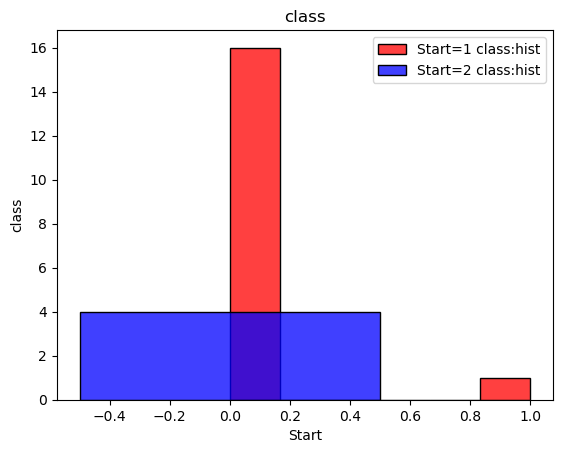

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


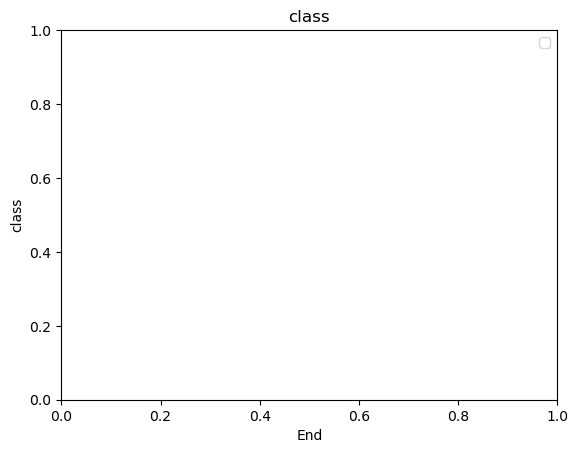

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


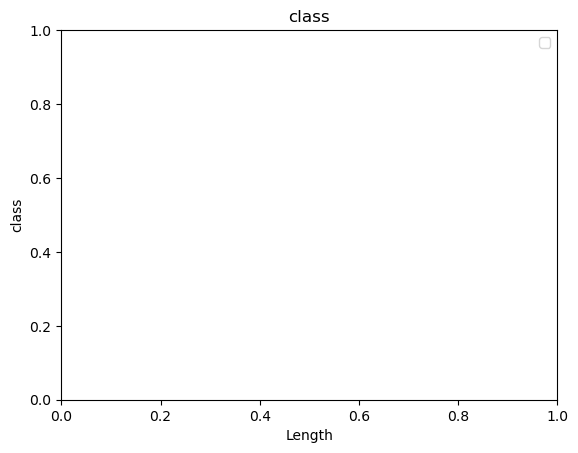

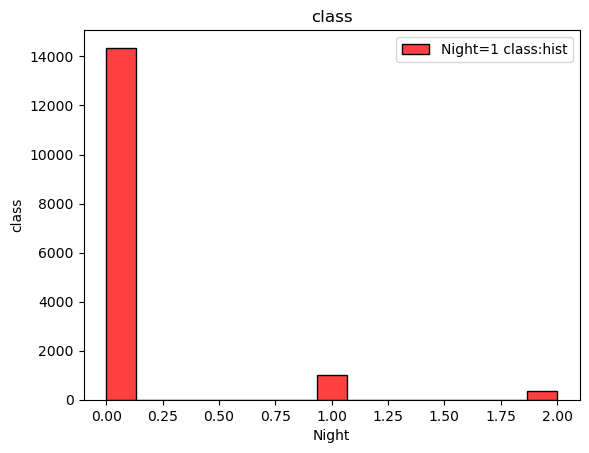

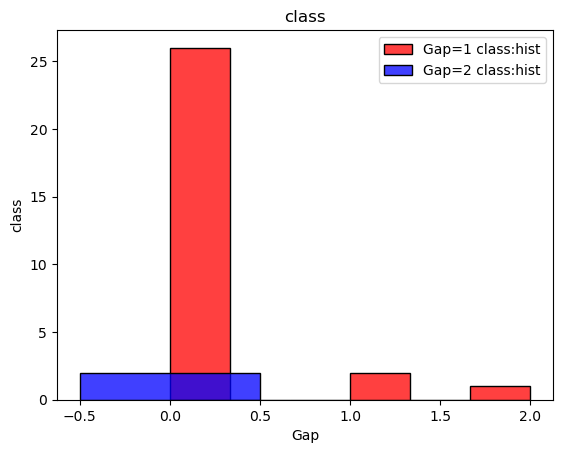

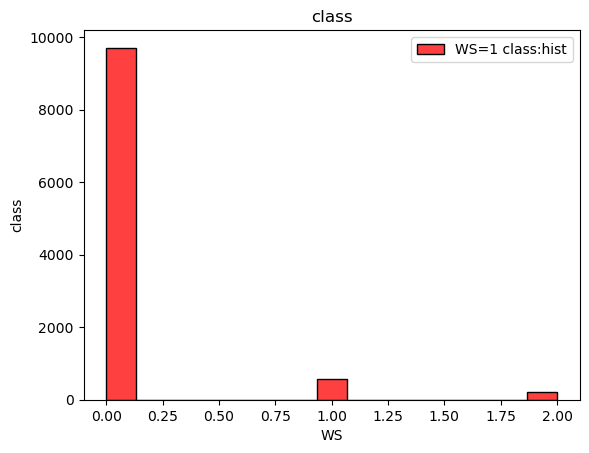

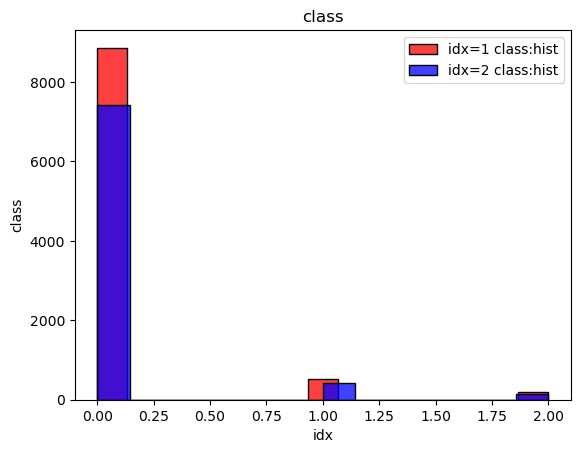

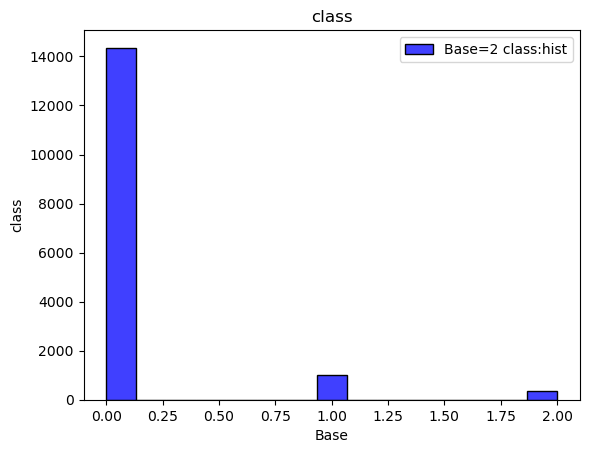

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


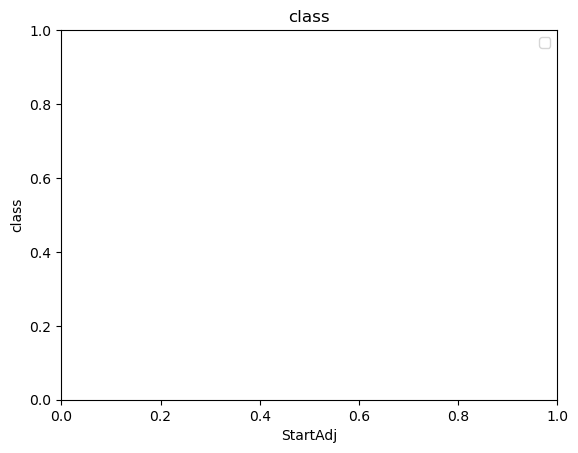

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


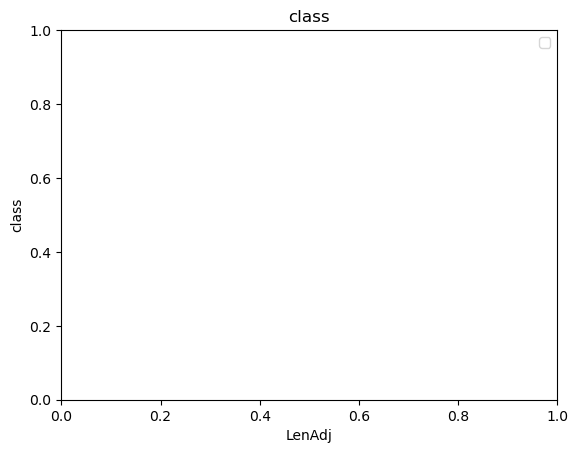

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


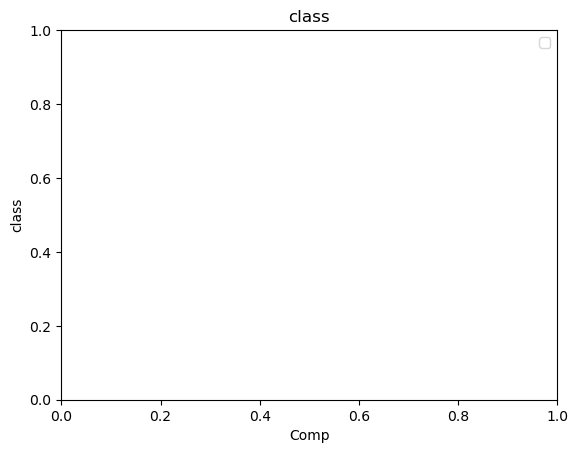

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


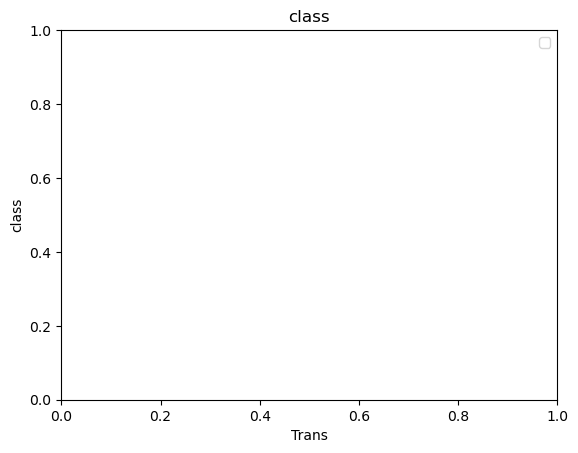

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


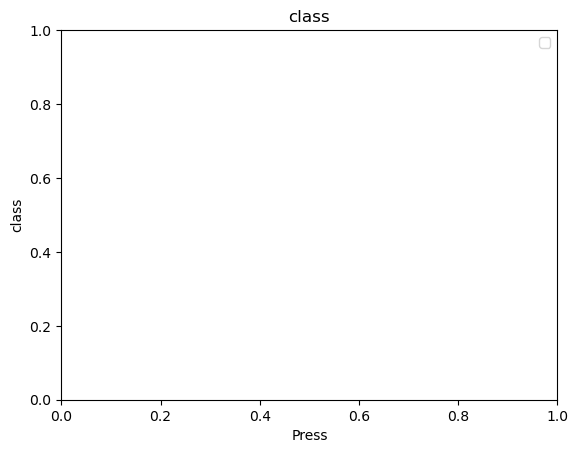

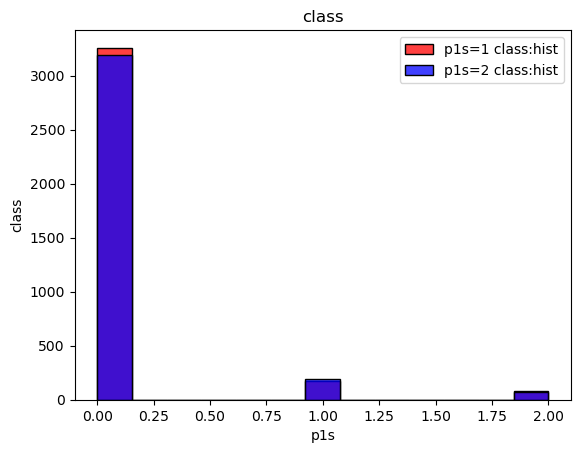

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


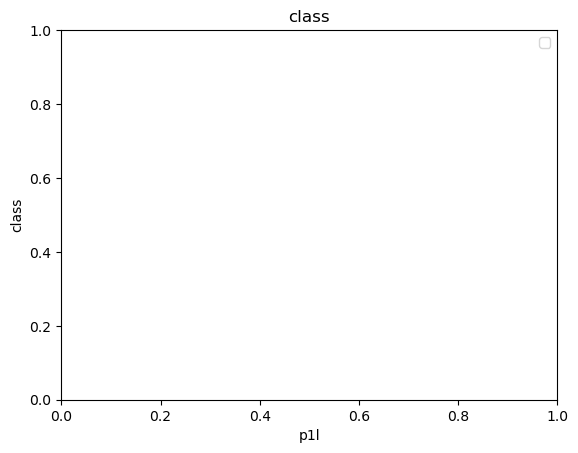

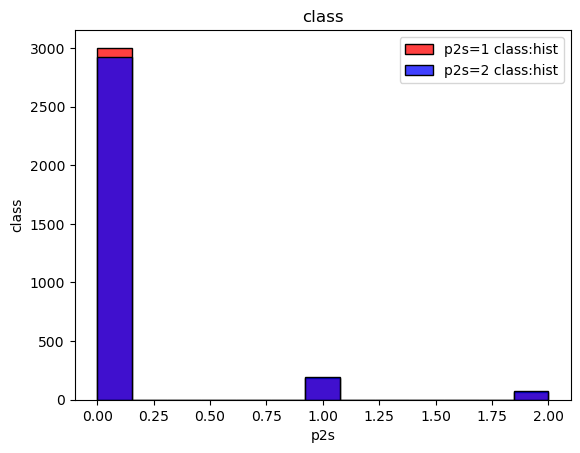

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


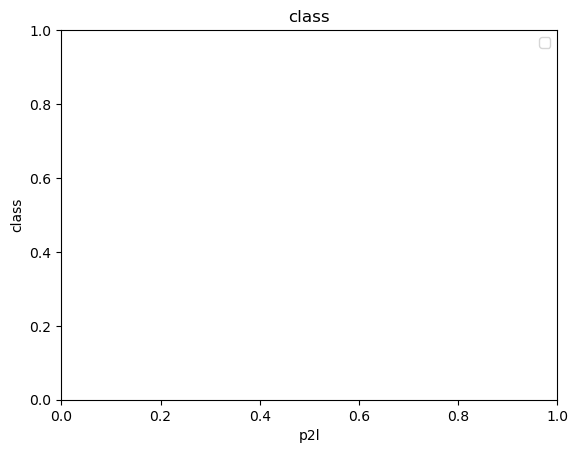

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


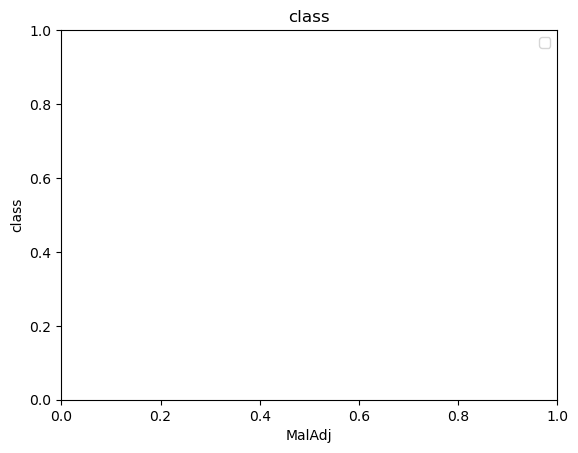

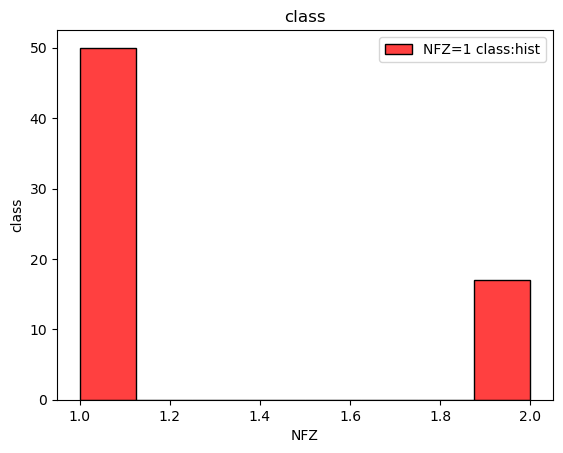

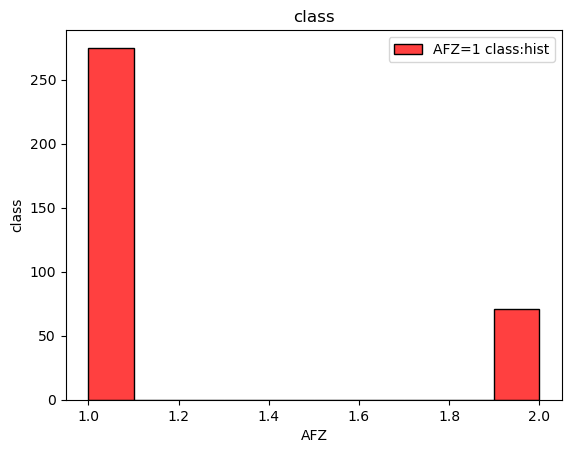

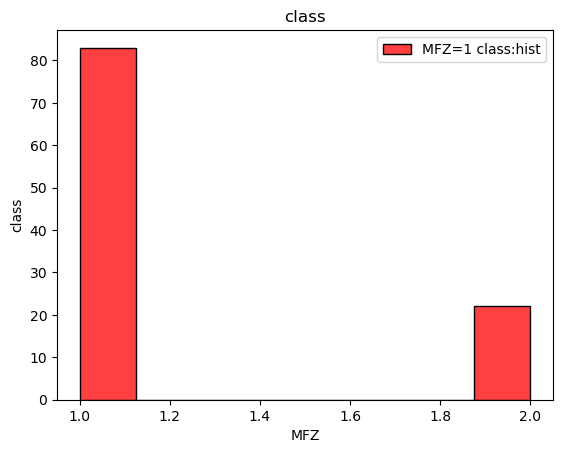

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;warnings.filterwarnings('ignore')
def kdeplotByValue(df,x_col,y_col):
  m = df[x_col].mean()
  g1 = df.loc[df[x_col]==1 ,y_col]
  g2 = df.loc[df[x_col]==2 ,y_col]
  sns.histplot(g1,label = x_col+'=1 '+ y_col + ':hist',color='red')
  sns.histplot(g2,label = x_col+'=2 '+ y_col + ':hist',color='blue')
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.title(y_col)
  plt.legend()
  plt.show()
all_features = df.columns.tolist()[:-1]
for x_col in all_features:
    kdeplotByValue(df,x_col,'class')

Ok, we can see it in the Start features
The distribution of classes is very different

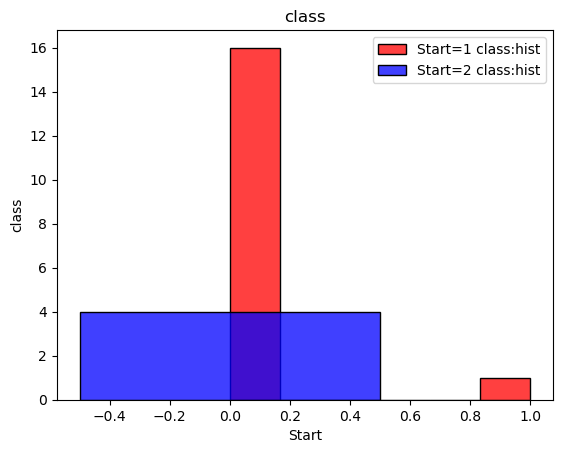

In [175]:
kdeplotByValue(df,'Start','class')

From the above figures, there is no obvious difference in distribution

Then try to build a classification model if the performance is poor
May represent little difference in features of the two classes
Theoretically, if there is little difference in features, it is difficult for the classification model to perform well

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df[all_features])
df.loc[:,all_features] = ss.transform(df[all_features])
df_remove_0 = df.loc[df['class']!=0,:] # Only classify 1 and 2
df_remove_0['class'].unique()

array([1, 2], dtype=int64)

In [177]:
from sklearn.model_selection import train_test_split
X = df_remove_0[all_features]
y = df_remove_0['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.714792899408284

# 2 .The second question (which depends upon the answer to the first!) is this: How accurately does the regressor classify the samples? 

Then the classification accuracy rate is (0.7147), not too low
In addition, the histogram distribution does have obvious differences in feature distribution between type1 and type2
Therefore I think type1 and type2 are distinguishable
It can be solved as a multi-classification problem

ok let's solve this three-class problem and plot the confusion matrix

In [178]:
X = df[all_features]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9472285200531624

In [179]:
from sklearn.metrics import confusion_matrix

y_true = y_test.values.tolist()
y_pred = clf.predict(X_test).tolist()
confusion_matrix(y_true, y_pred)

array([[11924,    27,     0],
       [  431,   192,     0],
       [  169,    48,     0]], dtype=int64)

Confusion matrix, without normalization
[[11924    27     0]
 [  431   192     0]
 [  169    48     0]]


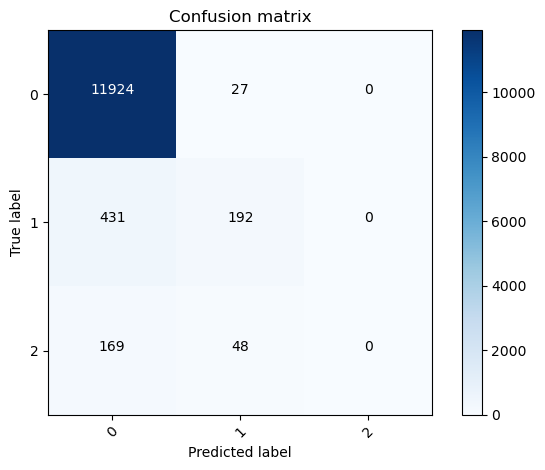

In [180]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
plot_confusion_matrix(cm=confusion_matrix(y_true, y_pred), classes=['0','1','2'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

# 3 . The third question is this: Which of the features (input columns) are significant in performing the classification, and which can/should be ignored?

we can use xgboost to find importance features

In [192]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 5.1 MB/s eta 0:00:00


<BarContainer object of 22 artists>

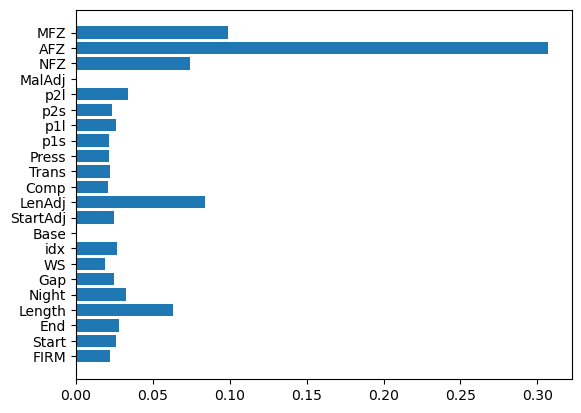

In [199]:
import xgboost
xgb = xgboost.XGBClassifier()
X = df[all_features]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
xgb.fit(X_train, y_train)
xgb.feature_importances_
plt.barh(all_features, xgb.feature_importances_)

According to the picture above, the most important feature is AFZ
The least important is MalAdj and Base